In [1]:
import numpy as np
import pandas as pd
import json_to_df as jd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data1 = jd.json_to_df_exhaust("../raw_data/data1.json")

In [3]:
data1.fillna(0, inplace=True)
stars = data1.stars.values
data1_ = data1.drop(columns = ["review_id","stars"])
features2 = data1_.drop(columns=["Monday_open", "Monday_close","Tuesday_open", "Tuesday_close","Wednesday_open", 
                                "Wednesday_close", "Thursday_open", "Thursday_close","Friday_open", "Friday_close",
                                "Saturday_open", "Sunday_open", "Saturday_close", "Sunday_close"]).values

In [4]:
rf = RandomForestClassifier(n_estimators=100,criterion="gini", max_depth=100,min_samples_split=5,min_samples_leaf=2,
min_weight_fraction_leaf=0.0, max_features="sqrt", max_leaf_nodes=None, min_impurity_decrease=0,
min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=-1, random_state=None,
verbose=True, warm_start=False, class_weight=None)

In [5]:
rf1 = rf.fit(features2, stars)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


In [6]:
rf1.oob_score_

0.561954085182036

In [7]:
feature_importance_dict = dict(zip(data1_.drop(columns=["Monday_open", "Monday_close","Tuesday_open", "Tuesday_close","Wednesday_open", 
                                "Wednesday_close", "Thursday_open", "Thursday_close","Friday_open", "Friday_close",
                                "Saturday_open", "Sunday_open", "Saturday_close", "Sunday_close"]).columns, rf1.feature_importances_))

In [8]:
feature_importance_ = sorted(feature_importance_dict.items(), key = lambda x: x[1], reverse = True)

In [9]:
for i in range(50):
    print(i,feature_importance_[i])

0 ('weekend_close', 0.1152807331040567)
1 ('weekday_close', 0.08568989677989108)
2 ('weekday_open', 0.06936532089098459)
3 ('staff', 0.05037580836077124)
4 ('weekend_open', 0.04994744994399824)
5 ('price', 0.04646871526112304)
6 ('distance', 0.03439155651523866)
7 ('clean', 0.02528588314660843)
8 ('equipment', 0.024528283777085144)
9 ('service', 0.02397029591897405)
10 ('membership', 0.021146736102833907)
11 ('ByAppointmentOnly', 0.01802992203895171)
12 ('class', 0.017881298504557438)
13 ('WheelchairAccessible', 0.017494473052449198)
14 ('GoodForKids', 0.016947086511671164)
15 ('BusinessParking', 0.0160254520895337)
16 ('BusinessAcceptsCreditCards', 0.01553564764007219)
17 ('time', 0.01504695902195231)
18 ('BikeParking', 0.013611892080099027)
19 ('is_open', 0.012784339621755108)
20 ('room', 0.01262909079828773)
21 ('parking', 0.012563002588712003)
22 ('crowd', 0.01167843660934747)
23 ('trainer', 0.010210543702303822)
24 ('pool', 0.008618979128932034)
25 ('sign', 0.008577724315451297)
2

In [10]:
# 画图前重新读取包含Missing data的数据, 避免分布中包含缺失值
data1 = jd.json_to_df_exhaust("../raw_data/data1.json")

In [11]:
## 给non_text 画图用
def plot_non_text(feature):
    (counts, bins, patch) = plt.hist([data1[data1[feature] > 0].stars, data1[data1[feature] <= 0].stars], rwidth = 0.6,
             bins=5, histtype="barstacked",edgecolor="black", alpha=0.7, label=["positive", "negative"])
    plt.legend()
    plt.show()
    return (counts, bins, patch)

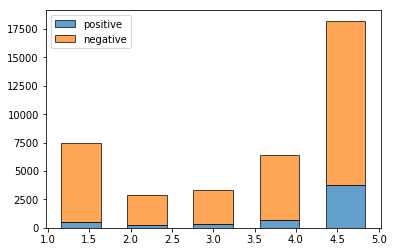

In [12]:
plt0 = plot_non_text("ByAppointmentOnly")

In [13]:
plt0[0]
#一行表示一个group(如positvie)在1-5分中的count

[array([ 553.,  259.,  311.,  730., 3779.]),
 array([ 7452.,  2882.,  3349.,  6432., 18223.])]

In [14]:
## 0表示 “缺失” 时画图用
## 0表示 “缺失” 时画图用
## 0表示 “缺失” 时画图用

##给text features画图用
def plot_text(feature):
    (counts, bins, patch) = plt.hist([data1[data1[feature] > 0].stars, data1[data1[feature] < 0].stars], rwidth = 0.6,
             bins=5, histtype="barstacked",edgecolor="black", alpha=0.7, label=["positive", "negative"])
    plt.legend()
    plt.show()
    return (counts, bins, patch)

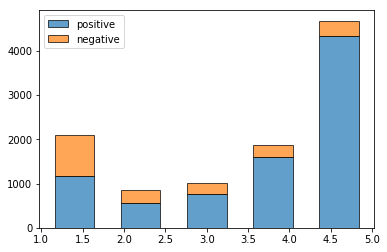

In [15]:
plt1 = plot_text("staff")

In [16]:
plt1[0]
#一行表示一个group(如positvie)在1-5分中的count

[array([1166.,  569.,  758., 1603., 4333.]),
 array([2095.,  856., 1011., 1881., 4681.])]

In [17]:
#开门时间画图
def plot_opentime(feature,time_split):
    (counts, bins, patch) = plt.hist([data1[data1[feature] <= time_split[0]].stars, 
                                      data1[(data1[feature] <= time_split[1])&(data1[feature] > time_split[0])].stars,
                                     data1[(data1[feature] <= time_split[2])&(data1[feature] > time_split[1])].stars, 
                                      data1[data1[feature] > time_split[2]].stars], rwidth = 0.6,
             bins=5, histtype="barstacked",edgecolor="black", alpha=0.7, 
                                     label=["earlier than %i o'clock" %time_split[0], "earlier than %i o'clock" %time_split[1],
                                            "earlier than %i o'clock" %time_split[2], "later than %i o'clock" %time_split[2]])
    plt.legend()
    plt.show()
    return (counts, bins, patch)

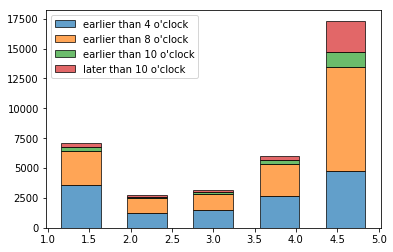

In [18]:
plt2 = plot_opentime("weekday_open",[4,8,10])

In [19]:
plt2[0]
#一行表示一个group(如earlier then 6am)在1-5分中的count

[array([3606., 1253., 1502., 2656., 4750.]),
 array([ 6400.,  2481.,  2867.,  5352., 13498.]),
 array([ 6797.,  2617.,  3010.,  5692., 14690.]),
 array([ 7069.,  2731.,  3148.,  6033., 17337.])]

In [20]:
#开门时间画图
def plot_closetime(feature,time_split):
    (counts, bins, patch) = plt.hist([data1[data1[feature] <= time_split[0]].stars, 
                                      data1[(data1[feature] <= time_split[1])&(data1[feature] > time_split[0])].stars,
                                     data1[(data1[feature] <= time_split[2])&(data1[feature] > time_split[1])].stars, 
                                      data1[data1[feature] > time_split[2]].stars], rwidth = 0.6,
             bins=5, histtype="barstacked",edgecolor="black", alpha=0.7, 
                                     label=["earlier than %i o'clock" %time_split[0], "earlier than %i o'clock" %time_split[1],
                                            "earlier than %i o'clock" %time_split[2], "later than %i o'clock" %time_split[2]])
    plt.legend()
    plt.show()
    return (counts, bins, patch)

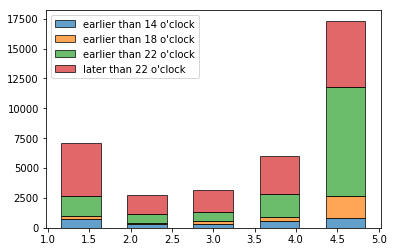

In [21]:
plt3 = plot_closetime("weekday_close",[14,18,22])

In [22]:
plt3[0]
#一行表示一个group(如earlier then 6pm)在1-5分中的count

[array([758., 312., 355., 562., 780.]),
 array([ 984.,  440.,  529.,  946., 2692.]),
 array([ 2656.,  1140.,  1332.,  2806., 11755.]),
 array([ 7069.,  2731.,  3148.,  6033., 17337.])]